<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio 1:

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

Importamos datos para ser analizados:

In [ ]:
casos_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv")
camas_df = pd.read_csv("https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv")
casos_df['nuevos']=0
casos_df['fecha']=casos_df.index
for x in range(1,88,1):
  casos_df['nuevos'][x]=casos_df['confirmados'][x]-casos_df['confirmados'][x-1]

cols = ['fecha','confirmados','nuevos']
casos_df[cols]

,fecha,confirmados,nuevos
0,0,106,0
1,1,114,8
2,2,124,10
3,3,137,13
4,4,154,17
...,...,...,...
83,83,2589,102
84,84,2714,125
85,85,2841,127
86,86,2906,65


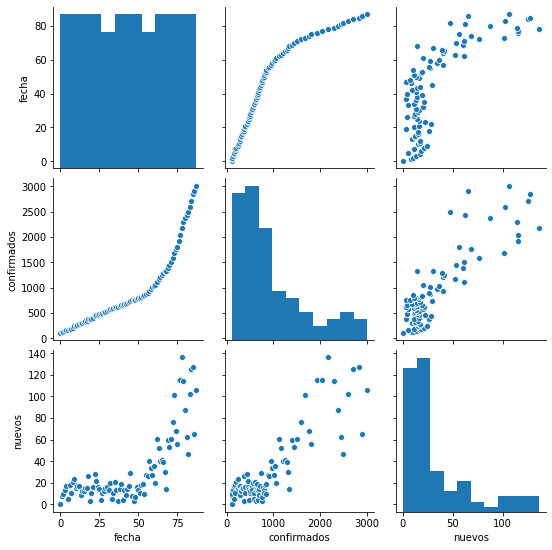

In [ ]:
sns.pairplot(casos_df[cols])

## Ejercicio 2:

Cargamos datasets de naranjas y mandarinas con distribuciones normales

In [116]:
np.random.seed(1)
#Promedio tamaño de naranjas
nmean=18
nstd=2
#Promedio tamaño de mandarinas
mmean=15
mstd=3
naranjas = pd.Series(np.random.normal(loc=nmean,scale=nstd,size=50))
tag1 = 'Naranja'
df1 = pd.DataFrame({'Tag':tag1,'Values':naranjas})
mandas = pd.Series(np.random.normal(loc=mmean,scale=mstd,size=50))
tag2 = 'Mandarina'
df2 = pd.DataFrame({'Tag':tag2,'Values':mandas})
df = pd.concat([df1,df2],ignore_index=True)
df

,Tag,Values
0,Naranja,21.248691
1,Naranja,16.776487
2,Naranja,16.943656
3,Naranja,15.854063
4,Naranja,19.730815
...,...,...
95,Mandarina,15.232020
96,Mandarina,13.968439
97,Mandarina,15.130791
98,Mandarina,13.139997


Seteamos limites de tamaños de naranjas para predecir:

In [117]:
dist = nstd
lbound = nmean-dist

Configuramos el filtro para naranjas, se supone que si es muy grande el dato este mal o sea una naranja por tener area grande:

In [118]:
naranja_pred = [False if x < lbound else True for x in df['Values']]
naranja_pred

[True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True]

Calculamos los verdaderos positivos:

In [119]:
tpr = (naranja_pred) & (df['Tag']=='Naranja')
tpr

0      True
1      True
2      True
3     False
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Tag, Length: 100, dtype: bool

Y los falsos positivos:

In [120]:
fpr = (naranja_pred) & (df['Tag']=='Mandarina')
fpr

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99     True
Name: Tag, Length: 100, dtype: bool

Y buscamos cuantos verdaderos positivos tenemos:

In [168]:
tpr.describe(include='all')

count       100
unique        2
top       False
freq         81
Name: Tag, dtype: object

Aca ya empezamos a improvisar con la curva ROC: 

In [172]:
t = pd.Series(range(44))
f = pd.Series(range(56))
roc = pd.DataFrame({'TPR':t,'FPR':f})
for x in tpr:
  if x:
    roc.

,TPR,FPR
0,0.0,0
1,1.0,1
2,2.0,2
3,3.0,3
4,4.0,4
5,5.0,5
6,6.0,6
7,7.0,7
8,8.0,8
9,9.0,9
